In [1]:
import numpy as np
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt

In [2]:
#read in data file and skip to data
file=open("/Users/Roslyn/Desktop/run-XXXII", "r")
#print(file.readline()) 

In [3]:
with file as f:
    lines_after_6 = f.readlines()[7:]

#print(lines_after_6[0])

In [4]:
#extract first two coloumns and convert to float
col1=[]
for x in lines_after_6:
    col1.append(float(x.split()[0]))
    
    
col2=[]
for x in lines_after_6:
    col2.append(float(x.split()[1]))

In [5]:
#combine real and imaginary parts to give list of complex data outputs
data=np.vectorize(complex)(col1, col2)
#print(data[0])
#print(len(data))

In [6]:
#chunks
#will try on one set for now, can then apply to more data in chunks

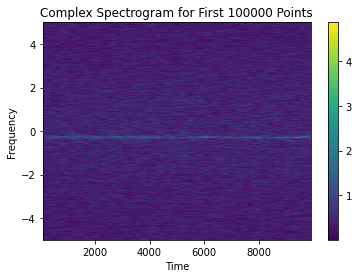

In [7]:
#complex spectrogram of first 1000000 points
f, t, Sxx = signal.spectrogram(data[:100000]-np.mean(data[:100000]), 10, nperseg=2000, return_onesided=False, mode='complex')
plt.pcolormesh(t, fftshift(f), fftshift(abs(Sxx), axes=0), shading='gouraud')
plt.colorbar()
plt.ylabel('Frequency')
plt.xlabel('Time')
plt.title('Complex Spectrogram for First 100000 Points')
plt.show()

#there is some loss in resolution here in order to get larger time axis 

In [8]:
print(len(Sxx))
print(len(f))
print(len(t))

2000
2000
57


In [9]:
#Dividing each row of spectrogram Sxx by the average for each frequency and taking abs value
absnormSxx=[]

for i in range(0,len(Sxx)):
    absnormSxx.append(abs((Sxx[i]/np.mean(abs(Sxx[i])))))
    

#checking this    
print(len(absnormSxx))
#print(absnormSxx[0])
#print(abs(Sxx[0]/np.mean(abs(Sxx[0]))))
print(len(absnormSxx[0]))

2000
57


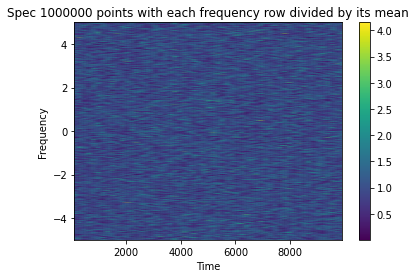

In [10]:
plt.pcolormesh(t, fftshift(f), fftshift(absnormSxx, axes=0), shading='gouraud')
plt.colorbar()
plt.ylabel('Frequency')
plt.xlabel('Time')
plt.title('Spec 1000000 points with each frequency row divided by its mean')
plt.show()

#this is flat as expected for normalised

In [11]:
#using test code, implement differencing and take abs value for plotting

timecols=[]
slice0=[]

for i in range(0,len(t)):
    slice0.clear()
    for j in range(0,len(absnormSxx)):
        slice0.append(absnormSxx[j][i])
    timecols.append(slice0[:])

print(len(timecols))
print(len(timecols[0]))

absdiff=[]
slice1=[]

for j in range(0,len(absnormSxx)):
    slice1.clear()
    for i in range(0,(len(t)-1)):
        slice1.append(abs(timecols[i+1][j]-timecols[i][j]))
    absdiff.append(slice1[:])
    
print(len(absdiff))
print(len(absdiff[0]))

57
2000
2000
56


In [12]:
#create time axis of matching dimension
difft=np.delete(t,0)
#print(len(difft))

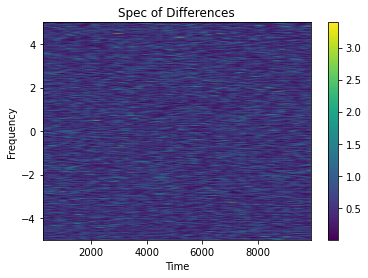

In [13]:
plt.pcolormesh(difft, fftshift(f), np.array(fftshift(absdiff)), shading='gouraud')
plt.colorbar()
plt.ylabel('Frequency')
plt.xlabel('Time')
plt.title('Spec of Differences')
plt.show()

In [14]:
#want to compare distribution around res frequency to away from this value representing background

In [15]:
absdiff = np.array(absdiff)
print(absdiff.shape)
#plt.plot(absdiff[:,0])

(2000, 56)


In [16]:
#locate frequency of peak in original spectrogram
#row in Sxx with highest mean 

meanSxx=[]

for i in range(0,len(Sxx)):
    meanSxx.append(np.mean(Sxx[i]))

peakfreqindex=np.argmax(meanSxx)
print(peakfreqindex)
print(f[peakfreqindex])
#this matches frequency peak visible on spectrogram

1952
-0.24


In [17]:
#select random ten 10% of rows far from peak to look at 'background'
#peak here is at index 1952 so far away from this could be around 1000

tenprows= (len(absdiff)/100) * 10
far10p=absdiff[1000:1000+int(tenprows),0:int(len(difft))].copy()

print(tenprows)
print(far10p.shape)

200.0
(200, 56)


In [18]:
#select 10% of rows centred on peak freq 
peakrows10p= absdiff[int(peakfreqindex-(tenprows/2)):int(peakfreqindex+(tenprows/2)),0:int(len(difft))].copy()
print(peakrows10p.shape)

#this isn't len 200 as there are only 2000 points (ordering of freq means it starts in centre of spec)
#if this is the case, add on the rest of the values from the array starting from zero


if len(peakrows10p) != tenprows:
    peakrowsfromcent=absdiff[0:int(tenprows-len(peakrows10p)),0:int(len(difft))].copy()
    peakrows10p=np.concatenate((peakrows10p, peakrowsfromcent), axis=0)

#peakrows10p=np.concatenate((peakrows10p1, peakrowsfromcent), axis=0)
print(peakrows10p.shape)

(148, 56)
(200, 56)


In [19]:
#print(np.amax(absdiff))
#print(np.amin(absdiff))
#print(np.argmax(absdiff))

#print(np.amax(first10p))
#print(np.amin(first10p))

#print(np.amax(peakrows10p))
#print(np.amin(peakrows10p))

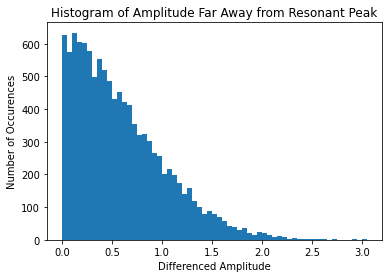

In [20]:
#code for separate histograms of values close to and far from the resonant peak

binwidth=0.05
binsaway= np.arange(0, np.amax(far10p)+binwidth, binwidth)

plt.hist(far10p.flatten(), binsaway)
plt.title('Histogram of Amplitude Far Away from Resonant Peak')
plt.xlabel('Differenced Amplitude')
plt.ylabel('Number of Occurences')
#plt.xlim(0,3)
#plt.ylim(0,80)
plt.show()


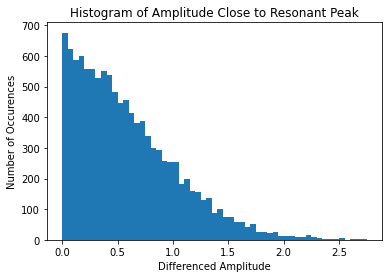

In [21]:
binwidth=0.05
binspeak= np.arange(0, np.amax(peakrows10p)+binwidth, binwidth)

plt.hist(peakrows10p.flatten(), binspeak)
plt.title('Histogram of Amplitude Close to Resonant Peak')
plt.xlabel('Differenced Amplitude')
plt.ylabel('Number of Occurences')
#plt.xlim(0,3)
#plt.ylim(0,80)
plt.show()

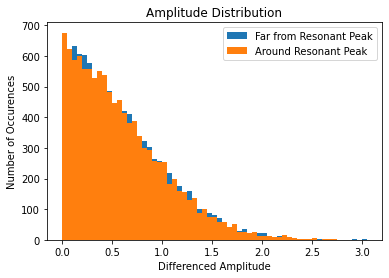

In [22]:
#Histograms plotted together  

plt.hist(far10p.flatten(), binsaway, label='Far from Resonant Peak')
plt.hist(peakrows10p.flatten(), binspeak, label='Around Resonant Peak')
plt.legend(loc='upper right')
plt.title('Amplitude Distribution')
plt.xlabel('Differenced Amplitude')
plt.ylabel('Number of Occurences')
plt.show()